<a href="https://colab.research.google.com/github/anapbatista/Algebra-Linear/blob/main/Problema_de_Procrustes_Ortogonal_%C3%81lgebra_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Trabalho Final - √Ålgebra Linear e Aplica√ß√µes**
### *Tema: Problema de Procrustes Ortogonal*

* Ana Paula de Abreu Batista | N¬∫ USP: 12688424
* Italo Carlos Martins Bresciani | N¬∫ USP: 15461782
* Luiz Gabriel Correia dos Santos | N¬∫ USP: 15639682
---

#### **Contexto e Problema**

No *Problema de Procrustes Ortogonal*, o objetivo √© encontrar a melhor transforma√ß√£o ortogonal para alinhar um conjunto de pontos a outro, minimizando a diferen√ßa entre eles. Esse problema tem diversas aplica√ß√µes, sendo uma delas na √°rea da vis√£o computacional, como a an√°lise de forma e o reconhecimento de padr√µes.


#### **Solu√ß√£o do Problema**

A matriz de rota√ß√£o √© uma ferramenta matem√°tica usada para girar pontos em um espa√ßo bidimensional. O objetivo √© alinhar duas cole√ß√µes de pontos, como aqueles de duas imagens diferentes.

A ideia principal por tr√°s da matriz de rota√ß√£o √© minimizar a diferen√ßa entre os pontos transformados de uma imagem e os pontos correspondentes de outra. Se n√£o houvesse minimiza√ß√£o, ocorreria um desalinhamento significativo, resultando em caracter√≠sticas correspondentes (como olhos, nariz e boca) que n√£o estariam sobrepostas corretamente.

Isso pode ser expresso matematicamente como:

$$
R = \underset{\Omega}{\text{arg min}} \| \Omega A - B \|_F
$$

Onde:

* $R$ √© a matriz de rota√ß√£o que queremos encontrar.
* $A$ representa os pontos da primeira imagem.
* $B$ representa os pontos da segunda imagem.
* $\| \cdot \|_F$ denota a norma de Frobenius, que mede a dist√¢ncia entre as duas cole√ß√µes de pontos.


Para resolver esse problema, utilizamos a Decomposi√ß√£o em Valores Singulares (SVD). A SVD nos permite fatorar a matriz de correla√ß√£o $H$ entre os pontos das duas imagens, resultando em tr√™s matrizes: $U$, $\Sigma$, e $V^T$.

Onde:

* $U$  √© a matriz ortogonal cujas colunas s√£o os vetores singulares √† esquerda, representando as dire√ß√µes principais dos dados em rela√ß√£o ao espa√ßo da linha.

* $\Sigma$ √© a matriz diagonal contendo os valores singulares de $H$, que indicam a import√¢ncia de cada dire√ß√£o principal e a varia√ß√£o total dos dados.

* $V^T$ √© a transposta de uma matriz ortogonal $V$, cujas colunas s√£o os vetores singulares √† direita, representando as dire√ß√µes dos dados em rela√ß√£o ao espa√ßo da coluna.


Com essa fatora√ß√£o, podemos representar a matriz de rota√ß√£o $R$ como:

$$R = UV^T$$

Esse passo √© crucial, pois nos fornece a rota√ß√£o necess√°ria para alinhar os pontos da imagem 2 aos da imagem 1, ou vice-versa.

Para garantir que a matriz $R$ preserve as propriedades de uma matriz de rota√ß√£o, precisamos que $R$ seja uma matriz ortogonal, o que significa que $R^T R = I$ (onde $I$ √© a matriz identidade).

Assim, a matriz de rota√ß√£o $R$ que minimiza a diferen√ßa entre os pontos transformados de $A$ e $B$ √© a que conseguimos atrav√©s dessa abordagem. Esse conceito √© fundamental em v√°rias aplica√ß√µes de processamento de imagem, como o alinhamento de faces.

#### **Aplica√ß√£o Pr√°tica**
A aplica√ß√£o pr√°tica desse tema escolhida √© o ajuste de formas em duas imagens. Dado um conjunto de pontos que representam caracter√≠sticas faciais de uma pessoa em duas fotos diferentes, usou-se o *Problema de Procrustes Ortogonal* para alinhar esses pontos, ajustando uma imagem em rela√ß√£o √† outra.

### **Direitos de Imagem**
Para respeitar os direitos de imagem e evitar a exposi√ß√£o pessoal, utilizou-se a *IA Influencer* ***Aitana Lopez*** como modelo para as fotos.

#### **Implementa√ß√£o**
1. Importar dois conjuntos de pontos que precisam ser alinhados.
2. Calcular a m√©dia de cada conjunto e centralizar os dados em torno da origem.
3. Aplicar a decomposi√ß√£o em valores singulares (SVD) para encontrar a matriz de rota√ß√£o $R$.
4. Transformar os pontos usando a matriz $R$ para alinhar os conjuntos.
5. Visualizar os resultados para confirmar o alinhamento.


### **Refer√™ncias**

1. Simon Ensemble. (2018). *Orthogonal Procrustes Problem.* Recuperado de [simonensemble.github.io](https://simonensemble.github.io/posts/2018-10-27-orthogonal-procrustes/)
2. Wikipedia. (n.d.). *Orthogonal Procrustes Problem.* Recuperado de [Wikipedia](https://en.wikipedia.org/wiki/Orthogonal_Procrustes_problem)
3. Hossain, T. (2021). *Understanding the Orthogonal Procrustes Problem.* Recuperado de [tamanna-hossain-kay.com](https://www.tamanna-hossain-kay.com/post/2021/06/28/orthogonal-procrustes/)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importando NumPy para c√°lculos matem√°ticos, matplotlib para visualiza√ß√£o e OpenCV para carregar e mostrar as imagens.
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image


In [ ]:
# Carregar as imagens
image1 = cv2.imread('/content/drive/MyDrive/Arquivos/aitana11.jpeg')
image2 = cv2.imread('/content/drive/MyDrive/Arquivos/aitana lopez2.jpeg')

# Converter para RGB para exibi√ß√£o com Matplotlib
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)


In [ ]:
# Carregar classificadores Haarcascade
face_cascade = cv2.CascadeClassifier("/content/drive/MyDrive/Arquivos/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("/content/drive/MyDrive/Arquivos/haarcascade_eye.xml")
def detect_facial_points(image):
    # Detectar rosto
    faces = face_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    facial_points = []  # Lista para armazenar pontos de caracter√≠sticas faciais

    for (face_x, face_y, face_w, face_h) in faces:
        # Definir o rosto para a detec√ß√£o de olhos
        roi_face = image[face_y:face_y+face_h, face_x:face_x+face_w]

        # Detectar olhos com restri√ß√µes para evitar detec√ß√£o incorreta
        eyes = eye_cascade.detectMultiScale(
            roi_face, scaleFactor=1.1, minNeighbors=5, minSize=(int(face_w * 0.2), int(face_h * 0.2))
        )

        eye_centers = []

        for (eye_x, eye_y, eye_w, eye_h) in eyes:
            # Considera apenas olhos na metade superior do rosto
            if eye_y < face_h * 0.5:
                eye_center = (int(face_x + eye_x + eye_w / 2), int(face_y + eye_y + eye_h / 2))
                eye_centers.append(eye_center)

        # Verifica se foram detectados olhos suficientes
        if len(eye_centers) >= 2:
            # Ordena os olhos da esquerda para a direita
            eye_centers = sorted(eye_centers, key=lambda e: e[0])

            left_eye_center = eye_centers[0]
            right_eye_center = eye_centers[1]
        else:
            left_eye_center = right_eye_center = None

        # Estima o ponto do queixo como uma posi√ß√£o abaixo do centro do rosto
        chin_center = (int(face_x + face_w * 0.5), int(face_y + face_h * 0.85))

        # Adiciona os pontos detectados √† lista
        if left_eye_center is not None:
            facial_points.append(left_eye_center)
        if right_eye_center is not None:
            facial_points.append(right_eye_center)

        facial_points.append(chin_center)

    # Converte a lista para np.array se houver pontos v√°lidos
    if len(facial_points) == 3:  # Precisamos de 3 pontos (dois olhos e um queixo)
        return np.array(facial_points)
    else:
        return None

# Detectar pontos faciais nas imagens
points_image1 = detect_facial_points(image1_rgb)
points_image2 = detect_facial_points(image2_rgb)

# Exibir os pontos
if points_image1 is not None:
    print("points_image1 =", points_image1)
else:
    print("N√£o foi poss√≠vel detectar os pontos faciais corretamente na imagem 1.")

if points_image2 is not None:
    print("points_image2 =", points_image2)
else:
    print("N√£o foi poss√≠vel detectar os pontos faciais corretamente na imagem 2.")


points_image1 = [[269 294]
 [376 304]
 [321 422]]
points_image2 = [[220 254]
 [334 256]
 [280 392]]


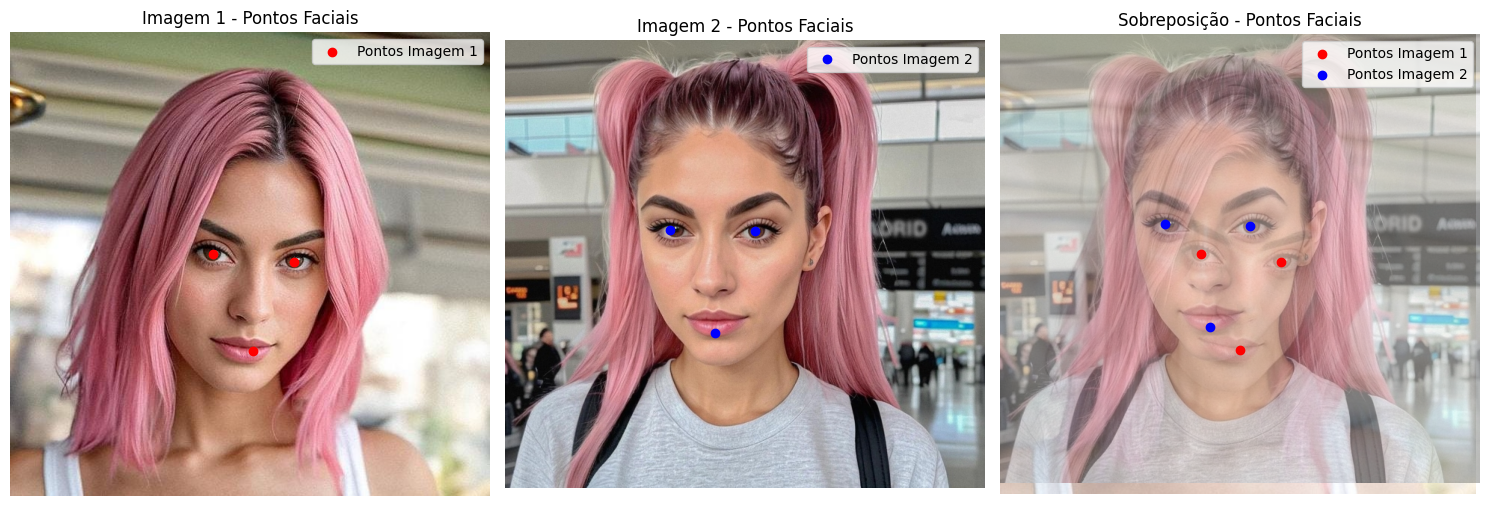

In [ ]:
# Visualizar as tr√™s imagens para compara√ß√£o
plt.figure(figsize=(15, 5))

# Exibir a imagem 1 com os pontos
plt.subplot(1, 3, 1)
plt.imshow(image1_rgb)
plt.scatter(points_image1[:, 0], points_image1[:, 1], color='red', label='Pontos Imagem 1')
plt.title("Imagem 1 - Pontos Faciais")
plt.axis('off')
plt.legend()

# Exibir a imagem 2 com os pontos
plt.subplot(1, 3, 2)
plt.imshow(image2_rgb)
plt.scatter(points_image2[:, 0], points_image2[:, 1], color='blue', label='Pontos Imagem 2')
plt.title("Imagem 2 - Pontos Faciais")
plt.axis('off')
plt.legend()

# Exibir sobreposi√ß√£o das imagens com os pontos
plt.subplot(1, 3, 3)
plt.imshow(image1_rgb, alpha=0.5)  # Imagem 1 com transpar√™ncia
plt.imshow(image2_rgb, alpha=0.5)  # Imagem 2 com transpar√™ncia
plt.scatter(points_image1[:, 0], points_image1[:, 1], color='red', label='Pontos Imagem 1')
plt.scatter(points_image2[:, 0], points_image2[:, 1], color='blue', label='Pontos Imagem 2')
plt.title("Sobreposi√ß√£o - Pontos Faciais")
plt.axis('off')
plt.legend()

plt.tight_layout()  # Ajusta o layout para evitar sobreposi√ß√£o
plt.show()

Para alinhar duas imagens, √© essencial que os pontos de refer√™ncia estejam centralizados em rela√ß√£o ao seu pr√≥prio centro. Por isso, subtrai-se a m√©dia dos pontos de cada imagem.

A m√©dia dos pontos √© dada por:

$$
\text{mean} = \frac{1}{N} \sum_{i=1}^{N} x_i
$$

onde $x_i$ s√£o as coordenadas dos pontos.

Depois de calcular a m√©dia, subtrai-se essa m√©dia de cada ponto. Assim, os pontos centralizados t√™m um centro em $(0,0)$. Isso simplifica os c√°lculos de transforma√ß√£o, como a rota√ß√£o.

A matriz de correla√ß√£o $H$ √© definida como:

$$
H = A^T B
$$

onde $A$ s√£o os pontos centralizados da imagem 1 e $B$ os da imagem 2. Essa matriz nos d√° uma medida de como as duas configura√ß√µes de pontos est√£o relacionadas.


Usa-se a Decomposi√ß√£o em Valores Singulares (SVD) para calcular a matriz de rota√ß√£o $R$:

$$
H=UŒ£V^T
$$

$U$ e $V$ s√£o matrizes ortogonais.
$Œ£$ √© uma matriz diagonal com os valores singulares.

Para encontrar a matriz de rota√ß√£o, realizou-se o produto das matrizes $U$ e $V$:

$$
R=V^TU
$$

Essa matriz $R$ representa a rota√ß√£o necess√°ria para alinhar os pontos.

Garante-se que a orienta√ß√£o n√£o seja invertida verificando se o determinante $R$ √© positivo. Se for negativo, invertemos a √∫ltima coluna de $V$.

Aplica-se $R$ aos pontos centralizados da imagem 2 e adicionamos a m√©dia da imagem 1 para reposicionar os pontos corretamente.

In [ ]:
# Centralizar os pontos para ambas as imagens
mean1 = points_image1.mean(axis=0)
mean2 = points_image2.mean(axis=0)

centered_points1 = points_image1 - mean1
centered_points2 = points_image2 - mean2


In [ ]:
# Matriz de correla√ß√£o
H = centered_points1.T @ centered_points2

In [ ]:
# Decomposi√ß√£o SVD para encontrar a matriz de rota√ß√£o
U, _, Vt = np.linalg.svd(H)
R = Vt.T @ U.T

# Garantir que a matriz de rota√ß√£o n√£o inverta a orienta√ß√£o
if np.linalg.det(R) < 0:
    Vt[2, :] *= -1  # Inverte a √∫ltima coluna de Vt
    R = Vt.T @ U.T

# Alinhar os pontos da imagem 2 √† imagem 1
aligned_points2 = centered_points2 @ R + mean1

Usa-se `np.hstack` para combinar a matriz de rota√ß√£o $R$ com a transla√ß√£o, que √© calculada como:

$$
translation=mean1‚àíùëÖ‚ãÖmean2
$$


Isso garante que o centro da imagem 2, ap√≥s a rota√ß√£o, coincida com o centro da imagem 1.

A matriz de transforma√ß√£o $M$ √© montada da seguinte forma:

$$
M = \begin{pmatrix}
R_{11} & R_{12} & t_x \\
R_{21} & R_{22} & t_y
\end{pmatrix}
$$

Aqui, $tx$ e $ty$ s√£o os componentes da transla√ß√£o.

Usa-se `cv2.warpAffine` para aplicar a matriz de transforma√ß√£o $M$ √† imagem 2. Isso resulta na `aligned_image2`, que agora deve estar corretamente alinhada com a imagem 1.



In [ ]:
# Calcular a matriz de transforma√ß√£o completa (rota√ß√£o + transla√ß√£o)
M = np.hstack((R, (mean1 - R @ mean2).reshape(-1, 1)))

# Calcular a transla√ß√£o
translation = mean1 - R @ mean2  # Transla√ß√£o para alinhar os centros

# Criar a matriz de transforma√ß√£o 2x3
M = np.array([[R[0, 0], R[0, 1], translation[0]],
              [R[1, 0], R[1, 1], translation[1]]])

# Aplicar a transforma√ß√£o para alinhar a imagem
aligned_image2 = cv2.warpAffine(image2, M, (image1.shape[1], image1.shape[0]))

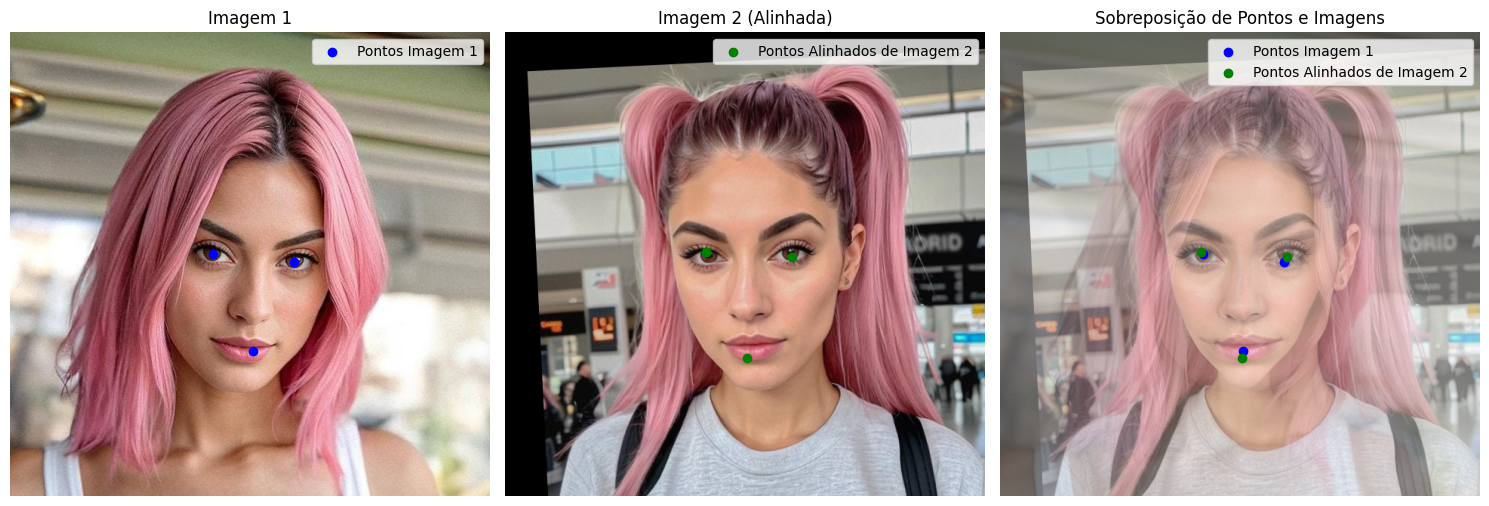

In [ ]:
# Mostrar as tr√™s imagens para comparar
plt.figure(figsize=(15, 5))

# Imagem original (image1)
plt.subplot(1, 3, 1)
plt.imshow(image1_rgb)
plt.scatter(points_image1[:, 0], points_image1[:, 1], color='blue', label='Pontos Imagem 1')
plt.title('Imagem 1')
plt.axis('off')  # Oculta os eixos para melhor visualiza√ß√£o
plt.legend()

# Imagem alinhada (aligned_image2)
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(aligned_image2, cv2.COLOR_BGR2RGB))
plt.scatter(aligned_points2[:, 0], aligned_points2[:, 1], color='green', label='Pontos Alinhados de Imagem 2')
plt.title('Imagem 2 (Alinhada)')
plt.axis('off')  # Oculta os eixos para melhor visualiza√ß√£o
plt.legend()

# Sobreposi√ß√£o das imagens com os pontos
plt.subplot(1, 3, 3)
plt.imshow(image1_rgb, alpha=0.5)  # Define uma transpar√™ncia para a primeira imagem
plt.imshow(cv2.cvtColor(aligned_image2, cv2.COLOR_BGR2RGB), alpha=0.5)  # Sobrep√µe a segunda imagem com transpar√™ncia
plt.scatter(points_image1[:, 0], points_image1[:, 1], color='blue', label='Pontos Imagem 1')
plt.scatter(aligned_points2[:, 0], aligned_points2[:, 1], color='green', label='Pontos Alinhados de Imagem 2')
plt.title('Sobreposi√ß√£o de Pontos e Imagens')
plt.axis('off')  # Oculta os eixos para melhor visualiza√ß√£o
plt.legend()

plt.tight_layout()  # Ajusta o layout para evitar sobreposi√ß√£o
plt.show()

O mesmo procedimento pode ser aplicado para alinhar os pontos da imagem 1 com os da imagem 2.

In [ ]:
# Alinhar os pontos da imagem 1 √† imagem 2
aligned_points1 = centered_points1 @ R + mean2  # Agora estamos alinhando a imagem 1 √† imagem 2

# Calcular a matriz de transforma√ß√£o completa (rota√ß√£o + transla√ß√£o)
translation = mean2 - R @ mean1  # Transla√ß√£o para alinhar os centros

# Criar a matriz de transforma√ß√£o 2x3
M = np.array([[R[0, 0], R[0, 1], translation[0]],
              [R[1, 0], R[1, 1], translation[1]]])

# Aplicar a transforma√ß√£o para alinhar a imagem 1
aligned_image1 = cv2.warpAffine(image1, M, (image2.shape[1], image2.shape[0]))


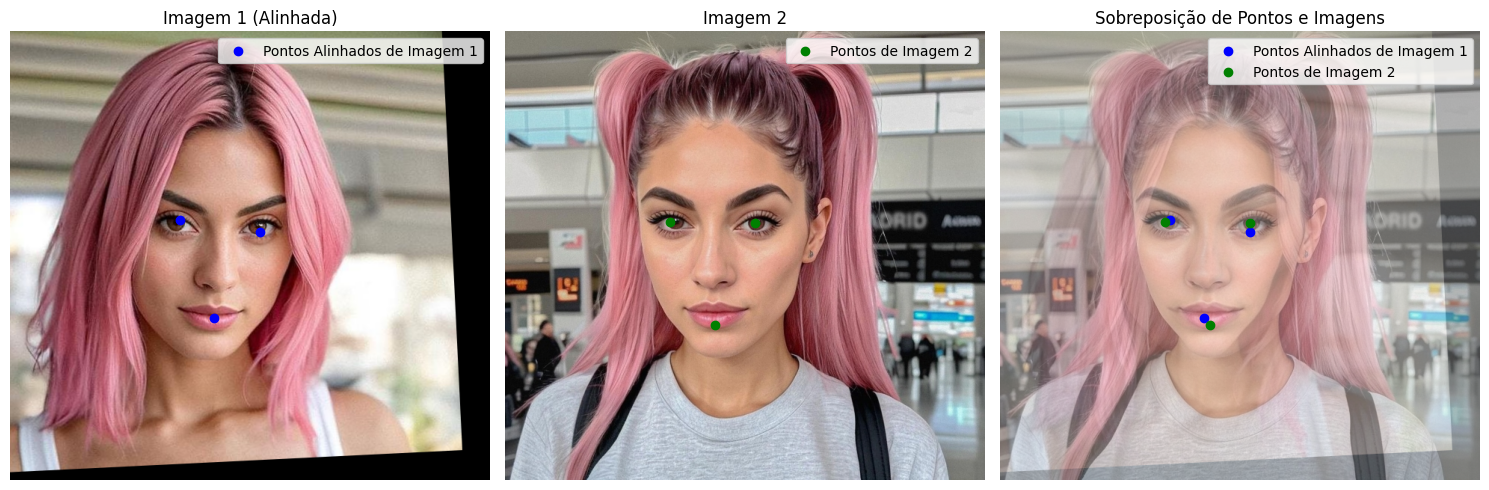

In [ ]:
# Mostrar as tr√™s imagens para comparar
plt.figure(figsize=(15, 5))

# Imagem 1 (agora alinhada √† imagem 2)
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(aligned_image1, cv2.COLOR_BGR2RGB))  # Imagem 1 alinhada
plt.scatter(aligned_points1[:, 0], aligned_points1[:, 1], color='blue', label='Pontos Alinhados de Imagem 1')
plt.title('Imagem 1 (Alinhada)')
plt.axis('off')  # Oculta os eixos para melhor visualiza√ß√£o
plt.legend()

# Imagem 2 original
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))  # Imagem 2 original
plt.scatter(points_image2[:, 0], points_image2[:, 1], color='green', label='Pontos de Imagem 2')
plt.title('Imagem 2')
plt.axis('off')  # Oculta os eixos para melhor visualiza√ß√£o
plt.legend()

# Sobreposi√ß√£o das imagens com os pontos
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(aligned_image1, cv2.COLOR_BGR2RGB), alpha=0.5)  # Imagem 1 alinhada com transpar√™ncia
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB), alpha=0.5)  # Imagem 2 original com transpar√™ncia
plt.scatter(aligned_points1[:, 0], aligned_points1[:, 1], color='blue', label='Pontos Alinhados de Imagem 1')
plt.scatter(points_image2[:, 0], points_image2[:, 1], color='green', label='Pontos de Imagem 2')
plt.title('Sobreposi√ß√£o de Pontos e Imagens')
plt.axis('off')  # Oculta os eixos para melhor visualiza√ß√£o
plt.legend()

plt.tight_layout()  # Ajusta o layout para evitar sobreposi√ß√£o
plt.show()
